# Global Climate Change Visualization and Prediction Using Decision Tree Super Vector Machine

###### Step 1: Importing all necessary libraries

In [68]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np
import joblib  # Added for model saving
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

###### Step 2: Load the Data Set

In [69]:
df = pd.read_csv('Global.csv',nrows=20000)
df.head(15)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


###### Step 3: Converting the DT Column to Day,Month and Year

In [70]:
# Convert 'dt' to day, month, and year
df['dt'] = pd.to_datetime(df['dt'])
df['day'] = df['dt'].dt.day
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year

In [71]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,1,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,2,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,3,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,4,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,5,1849


In [72]:
df.isna().sum() # To count the number of missing values

dt                                  0
AverageTemperature               1127
AverageTemperatureUncertainty    1127
City                                0
Country                             0
Latitude                            0
Longitude                           0
day                                 0
month                               0
year                                0
dtype: int64

In [73]:
df.shape # tuple(sequence of elements) representing number of rows and columns in data frame

(20000, 10)

###### Step 4: Data Preprocessing

In [74]:
# Data Cleaning
df = df.dropna()  # Replace NaN values with 0 or use other methods to handle missing data


###### Step 5: Exploratory Data Analysis(EDA)

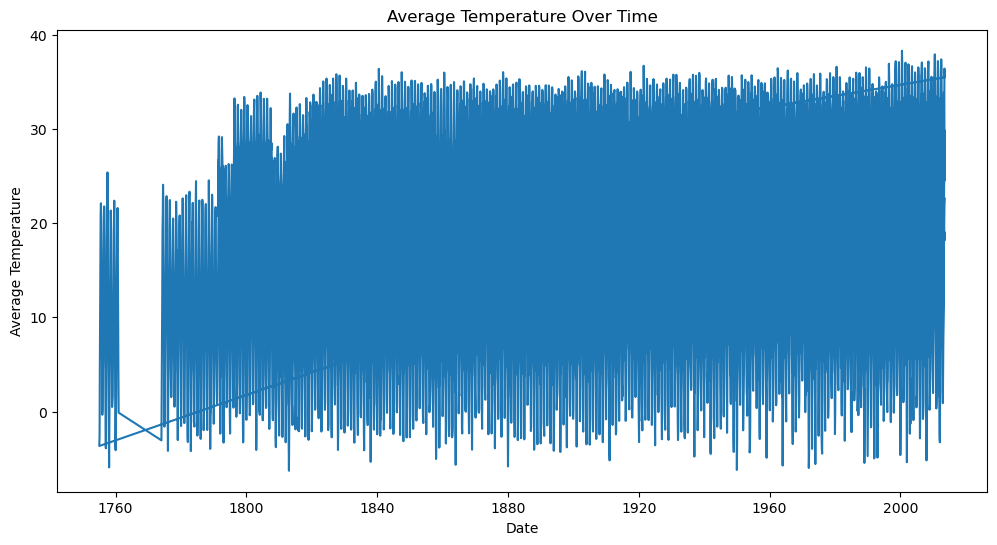

In [75]:
import matplotlib.pyplot as plt

# Assuming df as DataFrame
df['dt'] = pd.to_datetime(df['dt'])
plt.figure(figsize=(12, 6))
plt.plot(df['dt'], df['AverageTemperature'])
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()


###### Average temperature distributed

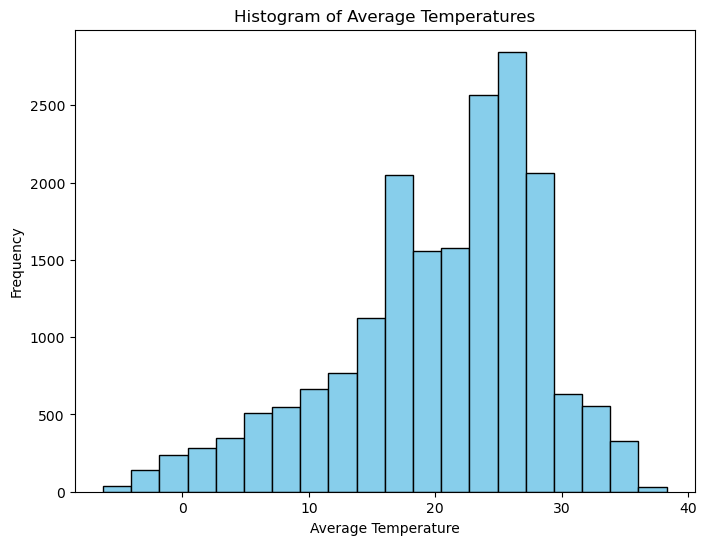

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(df['AverageTemperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Temperatures')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()


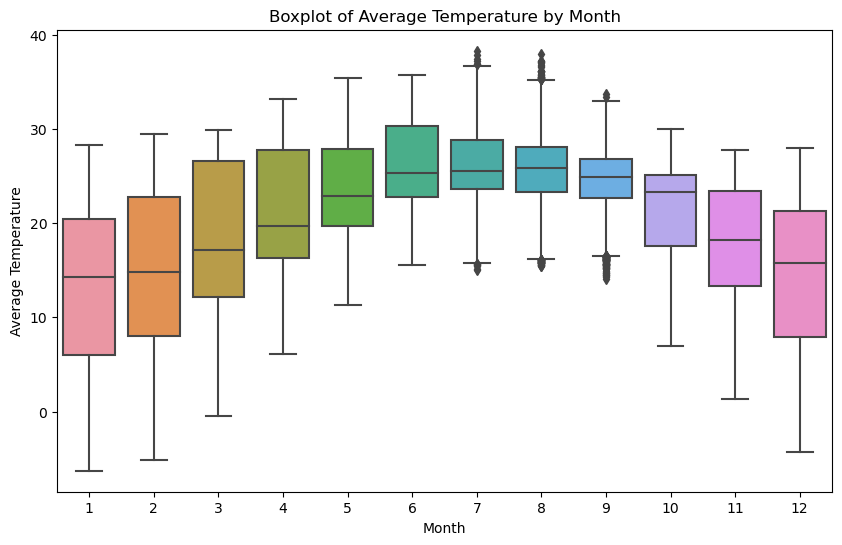

In [77]:
import seaborn as sns
df['Month'] = df['dt'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='AverageTemperature', data=df)
plt.title('Boxplot of Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.show()


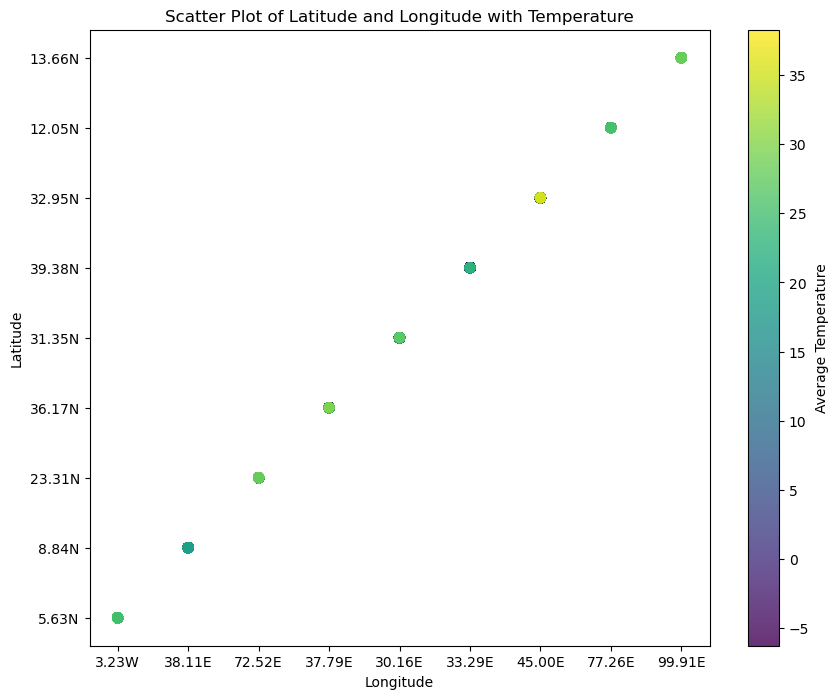

In [78]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['AverageTemperature'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(label='Average Temperature')
plt.title('Scatter Plot of Latitude and Longitude with Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


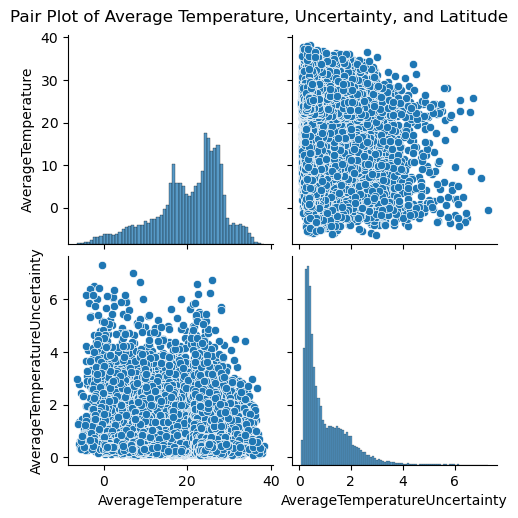

In [32]:
import seaborn as sns

sns.pairplot(df[['AverageTemperature', 'AverageTemperatureUncertainty', 'Latitude']])
plt.suptitle('Pair Plot of Average Temperature, Uncertainty, and Latitude', y=1.02)
plt.show()


In [79]:
df = df.drop(['dt'], axis=1)

In [80]:
from sklearn.preprocessing import LabelEncoder

# Identify string columns
string_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each string column
for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])


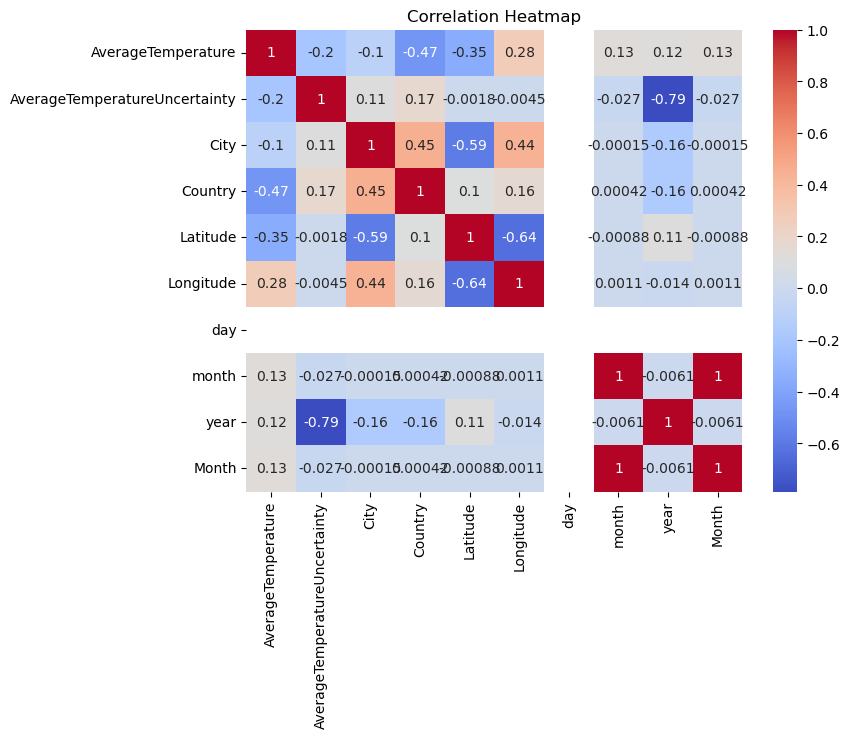

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [82]:
df.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,day,month,year,Month
0,26.704,1.435,0,0,7,0,1,1,1849,1
1,27.434,1.362,0,0,7,0,1,2,1849,2
2,28.101,1.612,0,0,7,0,1,3,1849,3
3,26.140,1.387,0,0,7,0,1,4,1849,4
4,25.427,1.200,0,0,7,0,1,5,1849,5


#### Using Decesion Tree super vector Machine 

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = df.drop(['AverageTemperature'], axis=1)
y = df['AverageTemperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

# Support Vector Regression
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

# Integration of Decision Tree and SVR
dt_predictions = dt_regressor.predict(X_test)
svr_predictions = svr_regressor.predict(X_test)

# Combining Outputs
final_predictions = (dt_predictions + svr_predictions) / 2  # Adjust as needed for your specific task

# Evaluate the model

mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 18.05177235091338
Root Mean Squared Error: 4.248737736188642
R-squared: 0.7266232244348938


In [84]:
# Save the models
joblib.dump(dt_regressor, 'dt_regressor_model.joblib')
joblib.dump(svr_regressor, 'svr_regressor_model.joblib')

# Loading the models 
dt_regressor = joblib.load('dt_regressor_model.joblib')
svr_regressor = joblib.load('svr_regressor_model.joblib')

# Getting user input for prediction
user_input = {
    'day': 6,  # Change the values according to the requirements
    'month': 2,
    'year': 2023,
    'Latitude': 0.0,
    'Longitude': 0.0,
    'Month': 2,
    'AverageTemperatureUncertainty': 0.0,
    'City': 'SampleCity',
    'Country': 'SampleCountry'
}

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Encode categorical columns if needed
label_encoder = LabelEncoder()
for column in ['City', 'Country']:
    user_df[column] = label_encoder.fit_transform(user_df[column])

# Predict with the models
dt_prediction = dt_regressor.predict(user_df[X.columns])
svr_prediction = svr_regressor.predict(user_df[X.columns])

# Combine predictions
final_prediction = (dt_prediction + svr_prediction) / 2  # Adjust as needed for your specific task

# Print the predicted average temperature
print(f'Predicted Average Temperature: {final_prediction[0]}')

Predicted Average Temperature: 25.725078090733078


In [85]:
user_df

,day,month,year,Latitude,Longitude,Month,AverageTemperatureUncertainty,City,Country
0,6,2,2023,0.0,0.0,2,0.0,0,0


##### Using Time Series Forecasting

In [86]:
# Load  dataset
df = pd.read_csv('Global.csv', nrows=20000)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [87]:
df.isna().sum()

dt                                  0
AverageTemperature               1127
AverageTemperatureUncertainty    1127
City                                0
Country                             0
Latitude                            0
Longitude                           0
dtype: int64

In [88]:
df=df.dropna()

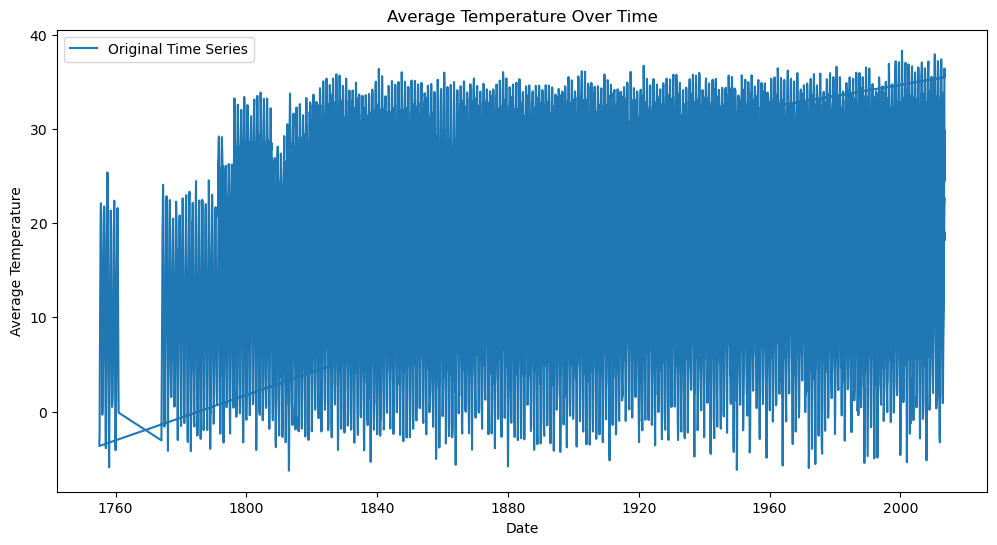

In [89]:
# Converting 'dt' to datetime and set it as the index
# Converting 'dt' to day, month, and year
df['dt'] = pd.to_datetime(df['dt'])
df['day'] = df['dt'].dt.day
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
df.set_index('dt', inplace=True)

# Considering  target variable is 'AverageTemperature'
ts = df['AverageTemperature']


# Plotting the time series data
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Original Time Series')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

In [90]:
# Splitting the data into training and testing sets
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# ARIMA Model
arima_order = (2, 1, 2)  # Example values, replace with appropriate values
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Forecast using ARIMA
arima_predictions = arima_fit.forecast(steps=len(test))

In [91]:
# SARIMA Model
sarima_order = (1, 1, 1, 12)  # Example values, replace with appropriate values
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast using SARIMA
sarima_predictions = sarima_fit.forecast(steps=len(test))


In [92]:
# Evaluating the models
def evaluate_model(predictions, actual):
    mse = mean_squared_error(actual, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(actual, predictions)
    return mse, rmse, r2

arima_mse, arima_rmse, arima_r2 = evaluate_model(arima_predictions, test)


print('ARIMA Model:')
print(f'Mean Squared Error: {arima_mse}')
print(f'Root Mean Squared Error: {arima_rmse}')
print(f'R-squared: {arima_r2}')



ARIMA Model:
Mean Squared Error: 30.59794777692172
Root Mean Squared Error: 5.531541175560544
R-squared: -0.007132629373425292


In [93]:
sarima_mse, sarima_rmse, sarima_r2 = evaluate_model(sarima_predictions, test)

print('\nSARIMA Model:')
print(f'Mean Squared Error: {sarima_mse}')
print(f'Root Mean Squared Error: {sarima_rmse}')
print(f'R-squared: {sarima_r2}')


SARIMA Model:
Mean Squared Error: 84.45160386424027
Root Mean Squared Error: 9.1897553756474
R-squared: -1.7797277933373867


In [ ]:
%run main.py

 * Serving Flask app "main" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Dec/2023 02:28:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Dec/2023 02:28:11] "GET /static/style.css HTTP/1.1" 304 -
127.0.0.1 - - [08/Dec/2023 02:28:11] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [08/Dec/2023 02:29:50] "GET / HTTP/1.1" 200 -
